# Brief Genome Exploration

A simple analysis of reference genome sizes. To start we load the genomes,    
chromosome info files and masks, which are set in preamble.py


To create the data that we'll plot, we need the raw genomic files which
are too big to share here. The following is the code that was used to 
calculate the values of the plot.

In [1]:
# # chrom_info files, two columns with the  chromosome names / sizes
# genome_info_fps = {
# "zebrafish" : "/home/ska/panos/myphdthesis/data/genomes/chromInfo_danRer10.txt",
# "amphioxus" : "/home/ska/panos/myphdthesis/data/genomes/chromInfo_braLan71.txt",
# "medaka" : "/home/ska/panos/myphdthesis/data/genomes/chromInfo_oryLat2.txt",
# "mouse" : "/home/ska/panos/myphdthesis/data/genomes/chromInfo_mm10.txt"}
# # repeat masks, set in the pream
# repeat_fps = {
# "zebrafish" : zebrafish_mask,
# "amphioxus" : amphi_mask,
# "medaka" : medaka_mask,
# "mouse" : mouse_mask}
# fasta_fps = {
# "zebrafish" : "/scratch/genomes/danRer10.fa",
# "amphioxus" : "/scratch/genomes/Bl71nemr.fasta",
# "medaka" : "/scratch/genomes/oryLat2.fa",
# "mouse" : "/scratch/genomes/mm10.fa"}
# compl = lambda spec: repeat_fps[spec].complement(g=genome_info_fps[spec])
# def countNs(fp):
#     c = Counter()
#     with open(fp,"r") as fi:
#         for line in fi:
#             if line.startswith(">"):
#                 continue
#             else:
#                 c+=Counter(line.rstrip().lower())
#     return c
            

# def get_counts(spec):
#     bd = compl(spec)
#     bd = bd.sequence(fi=fasta_fps[spec])
#     thed = countNs(bd.seqfn)
#     Ncount = thed.get('n')
#     effectiveCount = thed.get('a') + thed.get('c') + thed.get('g')+thed.get('t')
#     repDF = repeat_fps[spec].to_dataframe()
#     repeatCount = (repDF['end']-repDF['start']).values.sum()
#     return repeatCount, Ncount, effectiveCount
# speciesorder = ['amphioxus','zebrafish','medaka','mouse']
# # The main loop. It goes through all the fasta files so it takes a while
# lot =[ ]
# for spec in speciesorder:
#     lot.append( (spec, *get_counts(spec)) )
# df = pd.DataFrame(lot)
# df.columns = ["species","Repeats",'"N"s',"Effective Genome"]

Here we will just plot the final values which we hardcode in the following cell

In [1]:

df = pd.DataFrame([["amphioxus",152452412, 20252512,327521540],
["zebrafish",756790655,1964425,654384100],
["medaka",23221380,168573794,677265199],
["mouse",1201953154,78082998,1456094557]])
df.columns = ["species","Repeats","N's","Effective Genome"]
df

species     Repeats        N's  Effective Genome
0  amphioxus   152452412   20252512         327521540
1  zebrafish   756790655    1964425         654384100
2     medaka    23221380  168573794         677265199
3      mouse  1201953154   78082998        1456094557

In [2]:
df

species     Repeats        N's  Effective Genome
0  amphioxus   152452412   20252512         327521540
1  zebrafish   756790655    1964425         654384100
2     medaka    23221380  168573794         677265199
3      mouse  1201953154   78082998        1456094557

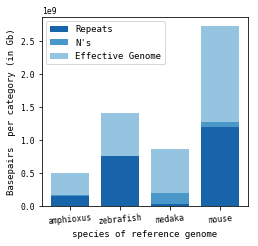

In [9]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.18, right=.99, top=.95)
Fwidth = THESIS_PAGEWIDTH/1.5
Fheight = Fwidth
# The stacked barplot (it's a bit convoluted...)
categories = df.columns[1:]
lo_cases = df.species.values
N = len(lo_cases) #how many bars in total are we plotting
palette = sns.color_palette("Blues_r",N)
ind = np.arange(N)    # the x locations for the groups
width=0.75 #how wide each column will be (if 1 they touch eachother)

c = np.zeros(N)
cou = 0
lot=[]
for cat,vals in df.iloc[:,1:].iteritems():
    p = ax.bar(ind, vals.values, width, bottom=c , color=palette[cou], alpha=1)
    c+=vals.values
    cou+=1
    lot.append(cat)

plt.xticks(ind, lo_cases,rotation=5)
plt.legend(lot, loc='upper left')

#>>> Name your Axes
ax.set_ylabel('Basepairs  per category (in Gb)')
ax.set_xlabel('species of reference genome')
fig.set_size_inches (Fwidth, Fheight)
#>>> OUTPUT NAME
fig.savefig('../Figures/from_notebooks/tfigure_TheGenomes.pdf')